# OpenClassrooms - parcours Data Analyst Business Intelligence - P8

# Milestone 1 - Analyse des données

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1.Type des données

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

In [1]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser
import pandas as pd, numpy as np, matplotlib.pyplot as plt
# N'oubliez pas d'avoir installé les librairies pandas, numpy et matplotlib via la commande pip

In [2]:
import os

In [3]:
print (os.getcwd())

C:\Users\doung


In [4]:
os.chdir(r"C:\Users\doung\Documents\Michèle\OPENCLASSROOMS - DATA ANALYST\P8")

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [7]:
#On importe les données dans un dataframe
data_historique = pd.read_excel("historique_immobilier_paris.xlsx")
data_portefeuille = pd.read_excel("portefeuille_actifs.xlsx")

Attention, si l'opération ci-dessus ne marche pas, il se peut que le package "openpyxl" ne soit pas présent sur votre ordinateur. Si c'est le cas vous pouvez l'installer en éxécutant la commande : pip install openpyxl ou conda install openpyxl.

In [8]:
#On vérifie que le type des données attribué par pandas est cohérent
data_historique.head()

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,Prix_m2
0,2017-01-03,550559.68,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50,11011.19
1,2017-01-12,1576492.46,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163,9671.73
2,2017-01-10,657757.36,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66,9966.02
3,2017-01-10,250086.82,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22,11367.58
4,2017-01-13,176266.71,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15,11751.11


In [9]:
data_portefeuille.head()

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.35,48.86
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.36,48.87
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.48,2,Appartement,65,3,2.36,48.86
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.29,2,Appartement,74,2,2.30,48.87
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.58,2,Appartement,22,1,2.31,48.88


### 2. Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [10]:
types_biens = data_historique['type_local'].unique()

print('la liste des différents types de biens immobiliers que nous avons dans les données est :')
print(types_biens)

la liste des différents types de biens immobiliers que nous avons dans les données est :
['Appartement' 'Local industriel. commercial ou assimilé']


In [11]:
code_type_local = data_historique['code_type_local'].unique()

print('la liste des différents types de biens immobiliers que nous avons dans les données est :')
print(code_type_local)

la liste des différents types de biens immobiliers que nous avons dans les données est :
[2 4]


On observe qu'il y a 2 types de biens, et que leurs codes types sont 2 et 4. 

### 3. Nombre de transactions

In [12]:
#On verifie le nombre de transactions que nous avons dans notre dataframe

nombre_transactions = data_historique.shape[0]
print('le nombre de transactions dans les données est :') 
print(nombre_transactions)

appartements = data_historique[data_historique['type_local'] == 'Appartement']
nombre_transactions_appartements = appartements.shape[0]
print('le nombre de transactions pour les appartements dans les données est :')
print(nombre_transactions_appartements)

locaux_commerciaux = data_historique[data_historique['type_local'] == 'Local industriel. commercial ou assimilé']
nombre_transactions_locaux_commerciaux = locaux_commerciaux.shape[0]
print('le nombre de transactions pour les locaux commerciaux dans les données est :')
print(nombre_transactions_locaux_commerciaux)

le nombre de transactions dans les données est :
26196
le nombre de transactions pour les appartements dans les données est :
24353
le nombre de transactions pour les locaux commerciaux dans les données est :
1843


### 4. interval de l'historique des données

In [13]:
#On vérifie également la plage de l'historique disponible

data_historique['date_mutation'] = pd.to_datetime(data_historique['date_mutation'])
premiere_date_transaction = data_historique['date_mutation'].min()
print('la première date de transaction dans les données est le ')
print(premiere_date_transaction)

derniere_date_transaction = data_historique['date_mutation'].max()
print('la dernière date de transaction dans les données est le ')
print(derniere_date_transaction)

la première date de transaction dans les données est le 
2017-01-02 00:00:00
la dernière date de transaction dans les données est le 
2021-12-31 00:00:00


## Commençons à analyser les données

Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au metre carré.

In [14]:
# Calcul de la colonne

data_historique['Prix_m2'] = data_historique['valeur_fonciere'] / data_historique['surface_reelle']
data_historique.head()

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,Prix_m2
0,2017-01-03,550559.68,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50,11011.19
1,2017-01-12,1576492.46,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163,9671.73
2,2017-01-10,657757.36,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66,9966.02
3,2017-01-10,250086.82,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22,11367.58
4,2017-01-13,176266.71,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15,11751.11


Maintenant, analysons les appartements.

### 5. Evolution du prix au metre carré des appartements dans Paris

In [15]:
#On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps

data_historique_appartements = data_historique[data_historique['type_local'] == 'Appartement']
data_historique_appartements.head()

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,Prix_m2
0,2017-01-03,550559.68,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50,11011.19
1,2017-01-12,1576492.46,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163,9671.73
2,2017-01-10,657757.36,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66,9966.02
3,2017-01-10,250086.82,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22,11367.58
4,2017-01-13,176266.71,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15,11751.11


In [16]:
#Préparons un dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée

data_historique_appartements['annee'] = data_historique_appartements['date_mutation'].dt.year

data_prix = data_historique_appartements.groupby('annee').agg({'valeur_fonciere': 'mean', 'surface_reelle': 'mean'})

C:\Users\doung\AppData\Local\Temp\ipykernel_12492\4274839685.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_historique_appartements['annee'] = data_historique_appartements['date_mutation'].dt.year


In [17]:
data_prix = data_prix.rename(columns={'valeur_fonciere': 'prix_moyen', 'surface_reelle': 'surface_moyenne'})
print(data_prix)

       prix_moyen  surface_moyenne
annee                             
2017    427963.24            44.63
2018    448055.76            44.27
2019    461950.06            43.36
2020    462383.25            42.90
2021    458771.51            43.48


On constate sur la moyenne des prix de vente des appartements à Paris qu'ils ont augmenté progressivement au fil des années jusqu'en 2020, atteignant un pic de 462 383 euros en moyenne.
En 2021, la moyenne des prix de vente des appartements à Paris était légèrement inférieure à celle de 2020, s'élevant à environ 458 771 euros.
Nous allons créer un graphique pour mieux le visualiser.

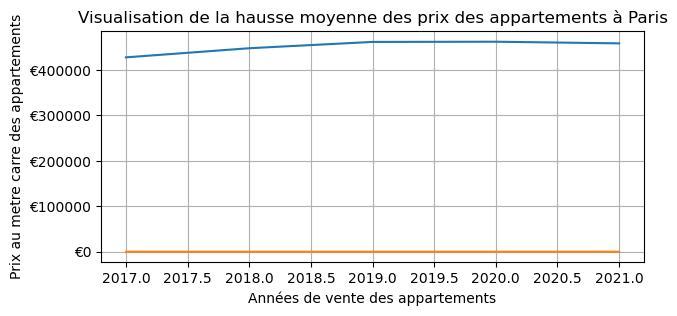

In [18]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(7,3))
plt.plot(data_prix.index, data_prix.values)
plt.xlabel('Années de vente des appartements')
plt.ylabel('Prix au metre carre des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Visualisation de la hausse moyenne des prix des appartements à Paris')
plt.show()

### 6. Différences de prix au metre carré entre les arrondissements

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

In [19]:
#Liste des codes postaux dans nos données.

codes_postaux = sorted(data_historique_appartements['code_postal'].unique())
print(codes_postaux)

[75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009, 75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018, 75019, 75020]


In [20]:
#Créeons un dataframe pour une deuxième visualisation avec l'evolution des prix par arrondissement

data_historique_appartements['code_postal'] = data_historique_appartements['code_postal'].astype(str)
data_historique_appartements['arrondissement'] = data_historique_appartements['code_postal'].str[-2:]


C:\Users\doung\AppData\Local\Temp\ipykernel_12492\2378845985.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_historique_appartements['code_postal'] = data_historique_appartements['code_postal'].astype(str)
C:\Users\doung\AppData\Local\Temp\ipykernel_12492\2378845985.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_historique_appartements['arrondissement'] = data_historique_appartements['code_postal'].str[-2:]


In [21]:
data_prix_arrondissement = data_historique_appartements.groupby(['arrondissement', 'annee'])['valeur_fonciere'].mean().reset_index()
data_prix_arrondissement.head()

,arrondissement,annee,valeur_fonciere
0,01,2017,530392.41
1,01,2018,581390.37
2,01,2019,454606.24
3,01,2020,601204.89
4,01,2021,639321.08


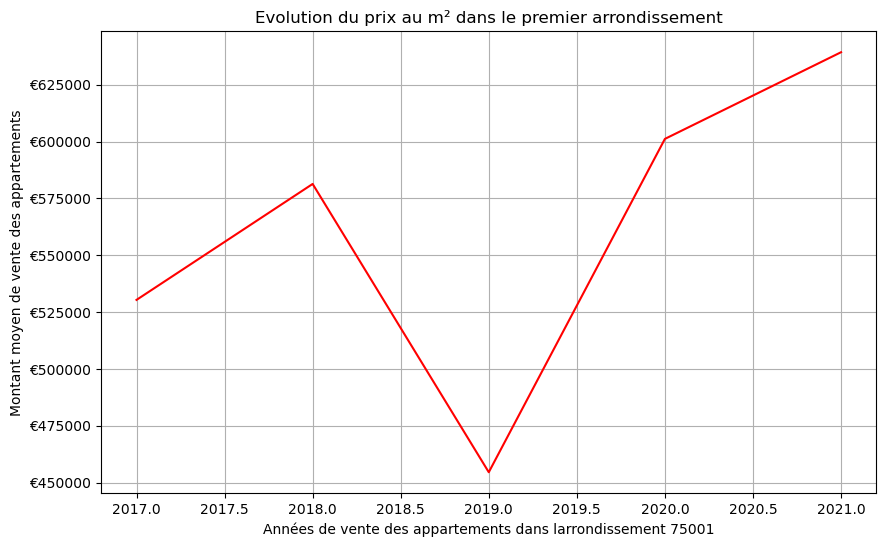

In [22]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix au metre carré dans le premier arrondissement
data_prix_arrondissement_01 = data_prix_arrondissement[data_prix_arrondissement['arrondissement'] =='01']
plt.figure(figsize=(10,6))
plt.plot(data_prix_arrondissement_01['annee'],data_prix_arrondissement_01['valeur_fonciere'], color='red')
plt.xlabel('Années de vente des appartements dans larrondissement 75001')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans le premier arrondissement')
plt.show()

Nous allons ajouter à cette visualisation tous les autres arrondissement avec une couleur différente.

In [23]:
arrondissements = data_prix_arrondissement['arrondissement'].unique()
print(arrondissements)

['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20']


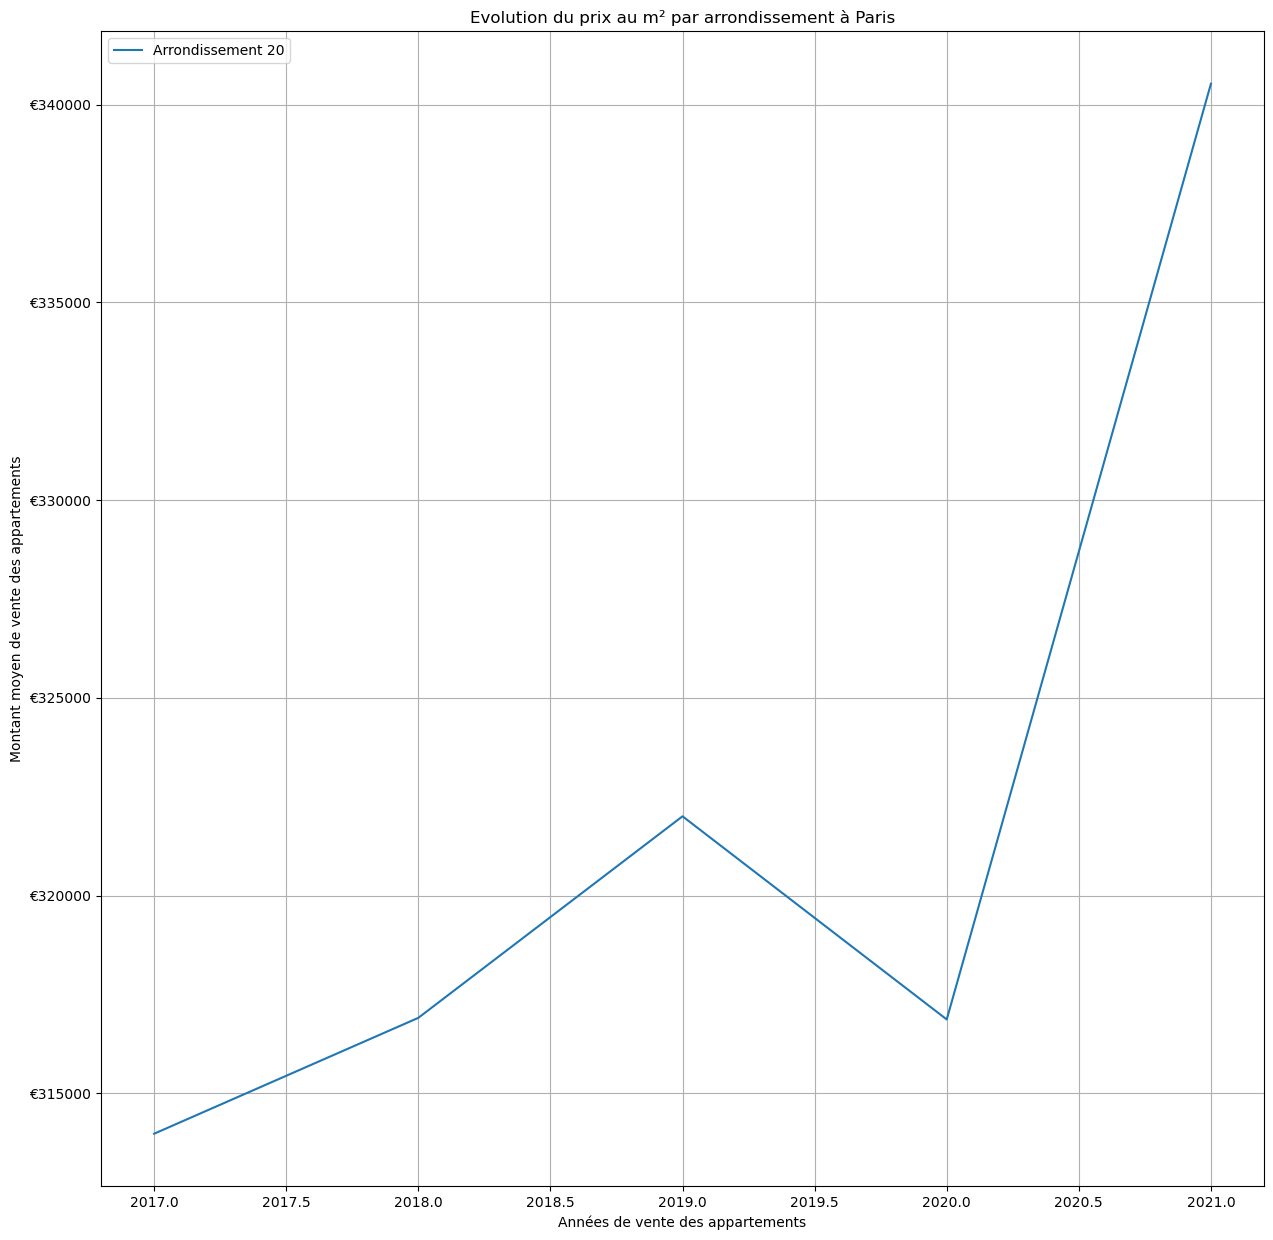

In [24]:
#On affiche l'évolution du prix au m² par arrondissement dans Paris
plt.figure(figsize=(15,15))

#Insérer les lignes à tracer ci-dessous


for i, arrondissement in enumerate(arrondissements):
    
    data_arrondissement = data_prix_arrondissement[data_prix_arrondissement['arrondissement'] == arrondissement]
plt.plot(data_arrondissement['annee'], data_arrondissement['valeur_fonciere'], label=f"Arrondissement {arrondissement}"),
plt.xlabel('Années de vente des appartements')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² par arrondissement à Paris')
plt.legend(loc='upper left')
plt.show()

On observe que globalement que ?

### 7. Prix au metre carré par transaction dans un arrondissement

In [25]:
#Vérifions le nombre de transaction dans le 6ème car le prix semble élevé

nombre_transactions_6eme = data_historique_appartements[data_historique_appartements['code_postal'] == '75006'].shape[0]
print("Nombre de transactions dans le 6ème arrondissement :", nombre_transactions_6eme)

Nombre de transactions dans le 6ème arrondissement : 709


On constate que ?

Affichons l'historique des transactions pour visualiser la dispersion des données :

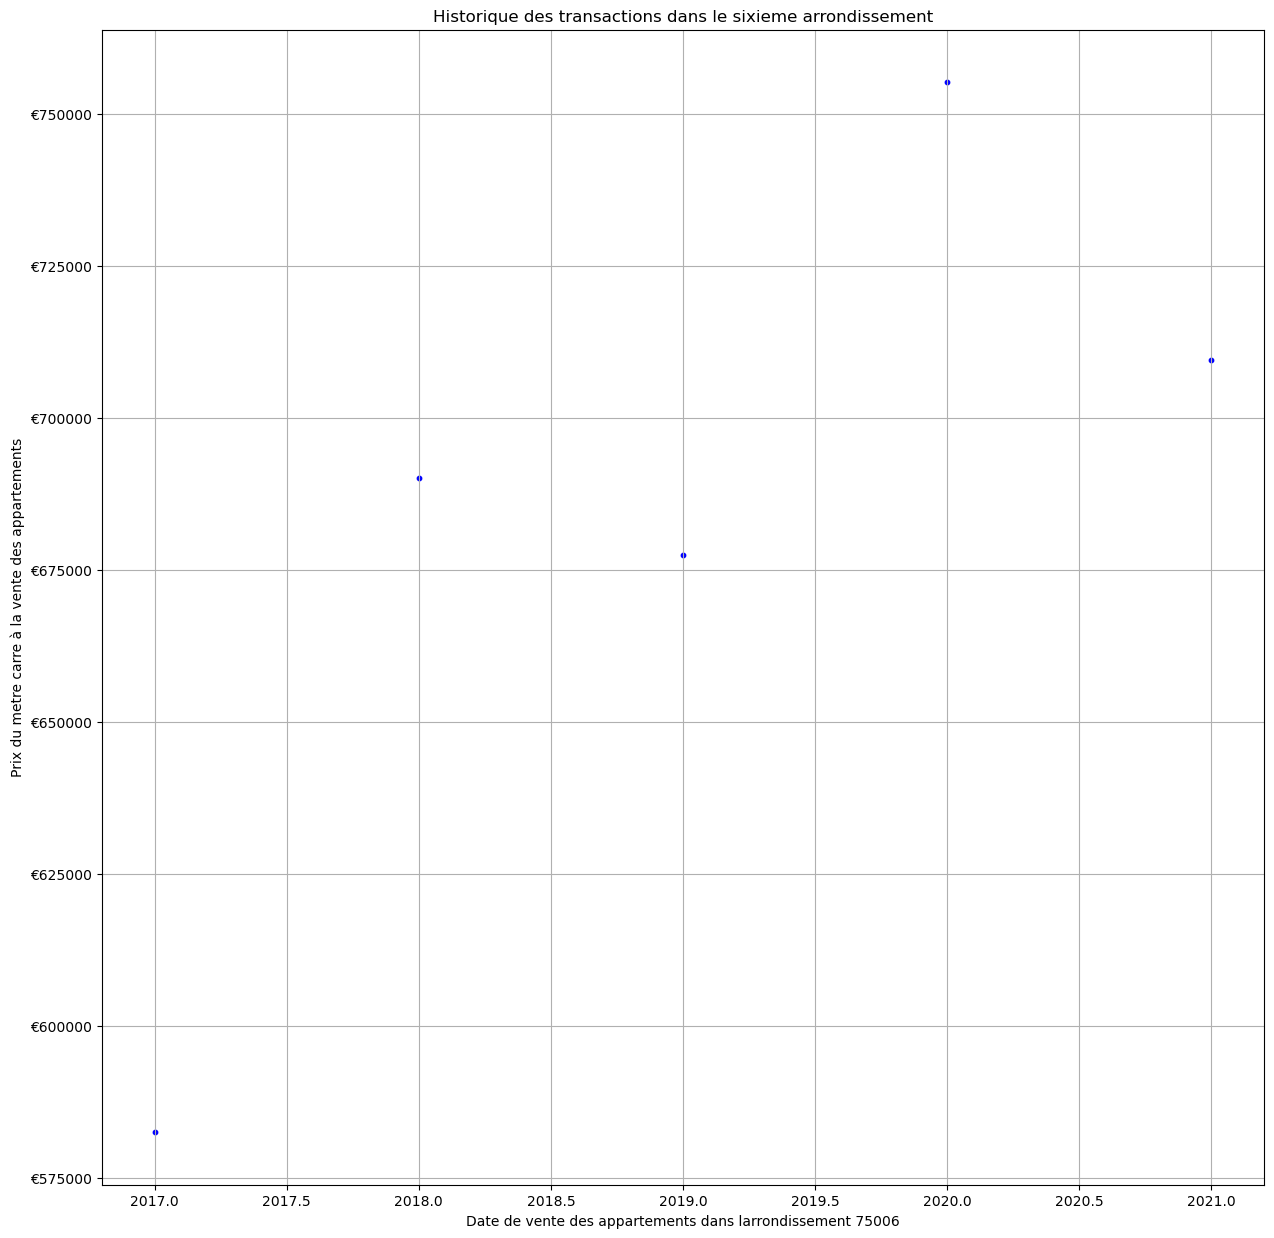

In [26]:
cp=75006
plt.figure(figsize=(15,15))
#Insérer ci-dessous le scatter plot
data_6eme = data_prix_arrondissement[data_prix_arrondissement['arrondissement'] == '06']
plt.scatter(data_6eme['annee'], data_6eme['valeur_fonciere'], s=10, color='blue')
plt.xlabel('Date de vente des appartements dans larrondissement 75006')
plt.ylabel('Prix du metre carre à la vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(which='both')
plt.title('Historique des transactions dans le sixieme arrondissement')
plt.show()

On observe que ?

Pour nous rassurer sur la relation entre les données nous allons utiliser un test statistique de corrélation.

### 8. Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Pearson 

Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

In [99]:
#On calcule la corrélation de Spearman
from scipy import stats
correlation_spearman = data_prix_arrondissement.corr(method='spearman')

C:\Users\doung\AppData\Local\Temp\ipykernel_18940\1194994012.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_spearman = data_prix_arrondissement.corr(method='spearman')


Le coefficient de corrélation est de ? avec une pvalue de ? donc nous pouvons confirmer la corrélation.

In [101]:
display(correlation_spearman)

,annee,valeur_fonciere
annee,1.00,0.14
valeur_fonciere,0.14,1.00


### 9. Vérification de la relation entre la valeur fonciere et la surface

Le coefficient de corrélation est de ? avec une pvalue de ?. La relation est donc confirmée.

Regardons maintenant si le type de bien à une influence sur le prix au metre carré également.

### 10. Analyse des locaux industriels, commerciaux et assimilés 

In [18]:
#On crée un dataset qui ne contient que les locaux commerciaux


In [19]:
#Préparons un dataframe en regroupant les prix au metre carré moyens des ventes par année


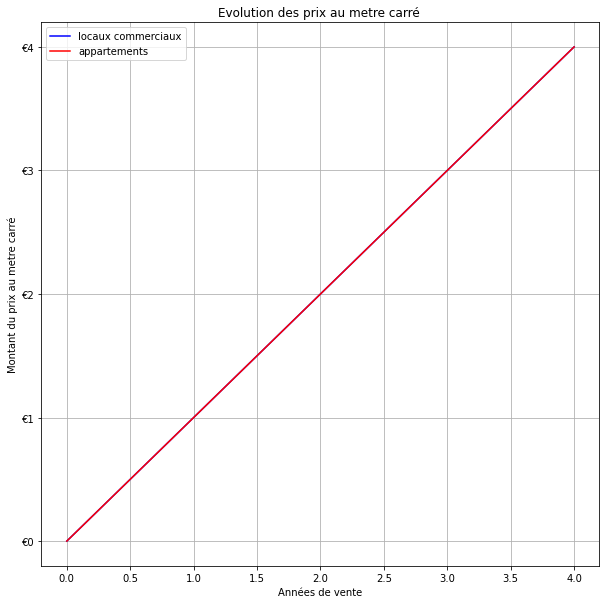

In [20]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
plt.figure(figsize=(10,10))
plt.plot(['2017','2018','2019','2020','2021'],label='locaux commerciaux',color='blue')
plt.plot(['2017','2018','2019','2020','2021'],label='appartements',color='red')
plt.xlabel('Années de vente')
plt.ylabel('Montant du prix au metre carré')
plt.legend()
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution des prix au metre carré ')
plt.show()

Le prix au metre carré des locaux commerciaux est ?

Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont : 
- la surface du bien immobilier,
- la date considérée, 
- la localisation (code_postal), 
- le type de bien.

# Milestone 2 - Entraînement de l'algorithme

Dans cette section nous allons maintenant entrâiner un algorithme à prédire la valeur fonciere d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

On commence par préparer nos données en transformant les colonnes catégoriques du code postal et du type de local grâce au one hot encoder (sklearn) / get_dummies (pandas)

On utilise le train_test_split pour prélever un tiers de nos données (33%) et les garder de côté. Nous allons entraîner notre algorithme sur le reste des données et puis mesurer notre erreur moyenne en pourcentage de la valeur foncière

In [21]:
# On importe le train test split de la librairie sk_learn
from sklearn.model_selection import train_test_split
# La valeur y à trouver est la valeur foncière
X_train, X_test, y_train, y_test = ['?','?','?','?']

In [22]:
#conversion des données en str


In [23]:
from sklearn.linear_model import LinearRegression
#On entraîne l'algorithme ci-dessous et on effectue la prédiction


Notre algorithme fait donc ? % d'erreur en moyenne sur la prédiction de la valeur foncière.

Mes conclusions sur ce résultat et comment j'aurais pu aller plus loin :
- ?
- ?
- ?
- ?

# Milestone 3 - Prédiction définitive pour le client 

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez. 

In [24]:
#On importe les données dans un dataframe


Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mettre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

In [25]:
#On réutilise les mêmes fonctions pour faire le one hot encoding des variables catégorielles

#On importe la librairie datetime pour pouvoir créer une colonne timestamp avec la date du 31 décembre 2022 pour la prédiction
import datetime as dt


In [26]:
#Conversion du dataframe en str


Notre dataframe est prêt à être utilisé par notre algorithme de prédiction.

In [27]:
#On effectue la prédiction

#On vérifie les 10 premières valeurs


Maintenant nous allons comparer la valorisation prédite pour les deux segments.

In [28]:
#Valorisation du portefeuille sur le segment des particuliers
print('la valorisation du segment particulier est (en millions deuros):')


la valorisation du segment particulier est (en millions deuros):


In [29]:
#Valorisation du portefeuille sur le segment corporate
print('la valorisation du segment corporate est (en millions deuros):')


la valorisation du segment corporate est (en millions deuros):


Mes conclusions sur le segment avec la plus grande valorisation et sur les limites de cette estimation :
- ?
- ?

# Milestone 4 - Classification des données issues du jeu de test

Dans cette partie nous allons labelliser automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Local industriel. commercial ou assimilé
Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

In [30]:
#On importe les données dans un dataframe


On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

Enfin toutes nos données sont de l'année 2021. Nous allons retirer cette dimension qui ne devrait pas être discriminante dans le regroupement des données.

Nous observons dans les données que nous avons des valeurs différentes de prix au mètre carré pour un même arrondissement (ici le 19ème arrondissement). Il se peut fort que cela soit notre dimension à utiliser pour attribuer les prix au mètre carré les plus élévé dans un département aux locaux commerciaux, et les prix les plus bas aux appartements.

Pour effectuer cette opération, nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

In [31]:
from sklearn.cluster import KMeans


In [32]:
# On vérifie les données de la prédiction


Nous avons obtenu notre prédiction. Nous pouvons changer les labels et remplacer les valeurs à 0 par Local industriel. commercial ou assimilé et les valeurs à +1 par Appartement. 

In [33]:
#On affiche les résultats


# Milestone 5 - Analyse et présentation des résultats

Mes conclusions sur l'analyse et les limites de l'exercice :
- ?
- ?